In [4]:
#---importing necessary libraries----
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#---Load dataset---
df = pd.read_csv("/content/Agora.csv", encoding="utf-8")

In [6]:
# --------Preview first few rows-------
print("Dataset Preview:")
print(df.head())

Dataset Preview:
         Vendor          Category  \
0    CheapPayTV  Services/Hacking   
1    CheapPayTV  Services/Hacking   
2     KryptykOG  Services/Hacking   
3      cyberzen  Services/Hacking   
4  businessdude  Services/Hacking   

                                                Item  \
0                        12 Month HuluPlus gift Code   
1  Pay TV Sky UK  Sky Germany HD TV  and much mor...   
2               OFFICIAL Account Creator Extreme 4.2   
3                          VPN > TOR > SOCK TUTORIAL   
4                             Facebook hacking guide   

                                    Item Description  \
0  12-Month HuluPlus Codes for $25. They are wort...   
1  Hi we offer a World Wide CCcam  Service for En...   
2  Tagged Submission Fix Bebo Submission Fix Adju...   
3  How to setup a VPN > TOR > SOCK super safe enc...   
4  .  This guide will teach you how to hack Faceb...   

                      Price   Origin  Destination  Rating  Remarks  
0   0.05027025666

In [7]:
#------- Check column names------
print("\nColumns in dataset:")
print(df.columns)


Columns in dataset:
Index(['Vendor', ' Category', ' Item', ' Item Description', ' Price',
       ' Origin', ' Destination', ' Rating', ' Remarks'],
      dtype='object')


In [8]:
# --- Cleaning: standardize column names ---
# removes the trailing whitespace from all columns
df.columns = df.columns.str.strip().str.lower()

# ----Drop rows where important fields are missing-------
# removes rows where column has missing value (NaN)
df = df.dropna(subset=['category', 'item'])

# ------Convert Price------
#converting into floating values for better performance on numeric data
df['price'] = df['price'].replace('[^0-9.]', '', regex=True).astype(float)

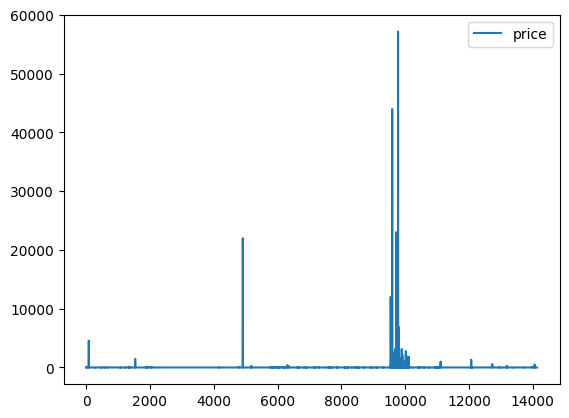

In [9]:
#-------line plot of price column---------------
df.plot()
plt.show()

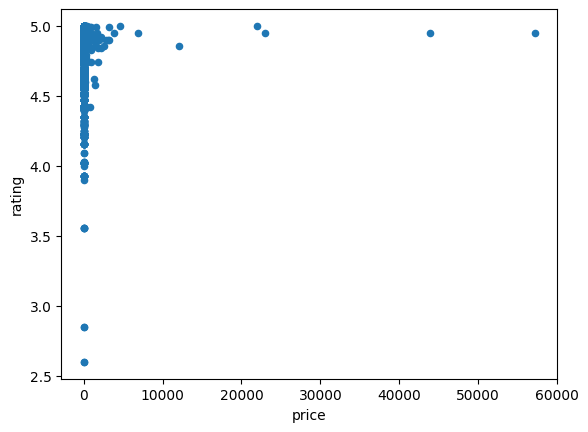

In [10]:
# ------Convert Rating to numeric, coercing errors to NaN---------
df['rating'] = df['rating'].astype(str).str.split('/').str[0]

#converts extracted string into a numeric format
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# -------Drop rows where Rating is NaN---------
df.dropna(subset=['rating'], inplace=True)

df.plot(kind = 'scatter', x = 'price', y = 'rating')
plt.show()

In [11]:
# --- Sample Analysis Goal ---
# Count frequency of credentials leaks & service ads

# ------Convert to lowercase for consistency---------
df['category'] = df['category'].str.lower()
df['item'] = df['item'].str.lower()

#----- Define keyword filters -------
cred_keywords = ["credential", "leak", "password", "account", "database"]
service_keywords = ["service", "ads", "advertisement", "subscription"]

In [19]:
# ------checking the leaks ----------
def classify_category(text):
    if any(word in text for word in cred_keywords):
        return "Credential Leak"
    elif any(word in text for word in service_keywords):
        return "Service Ad"
    else:
        return "Other"

df['classified'] = df['category'].apply(classify_category)
# Filter the DataFrame to show only rows classified as "Credential Leak"
credential_leaks_df = df[df['classified'] == 'Credential Leak']

# Display the filtered DataFrame
print("\nRows classified as Credential Leak:")
display(credential_leaks_df)


Rows classified as Credential Leak:


,vendor,category,item,item description,price,origin,destination,rating,remarks,classified
1467,DrawkwarD,data/accounts,college rules account [lifetime + freebies],Get a CollegeRules.com account now for a fract...,0.031567,NaN,NaN,4.996,NaN,Credential Leak
1468,fake,data/accounts,10.000.000 emails,megalist of 10.000.000 emails without passwordS,0.068447,NaN,NaN,4.782,NaN,Credential Leak
1469,NotoSeller,data/accounts,naughtyamerica.com - [lifetime porn premium ac...,Website: http://www.naughtyamerica.com \t Watc...,0.036414,Torland,NaN,4.920,NaN,Credential Leak
1470,DrawkwarD,data/accounts,ustvnow account [lifetime + freebies],Get a USTVNow account for a fraction of the ac...,0.024062,NaN,NaN,4.996,NaN,Credential Leak
1471,NotoSeller,data/accounts,babes.com - [lifetime porn premium account],Website: http://www.babes.com Welcome to Babe...,0.035334,Torland,NaN,4.920,NaN,Credential Leak
...,...,...,...,...,...,...,...,...,...,...
1594,fake,data/accounts,rare anonymous email account,FOR SALE ONE RARE ANONYMOUS CLEAN FRESH EMAIL ...,0.106079,NaN,NaN,4.782,NaN,Credential Leak
1595,Beachside,data/accounts,netflix account lifetime!,You get 1 Netflix account life time warranty ...,0.009691,NaN,NaN,4.770,NaN,Credential Leak
1596,5588,data/accounts,japan cc credit/debit - master/visa/amex japan...,There are no replacements for this listing. I ...,0.082091,Japan,NaN,5.000,NaN,Credential Leak
1597,Charlie_Bartlett,data/accounts,brazzers.com user/pass,Brazzers.com USER/PASS,0.024695,NaN,NaN,4.760,NaN,Credential Leak


In [13]:
#----- Frequency count ------
freq = df['classified'].value_counts()

print("\nFrequency of classified categories:")
print(freq)


Frequency of classified categories:
classified
Other              11277
Service Ad           372
Credential Leak      122
Name: count, dtype: int64


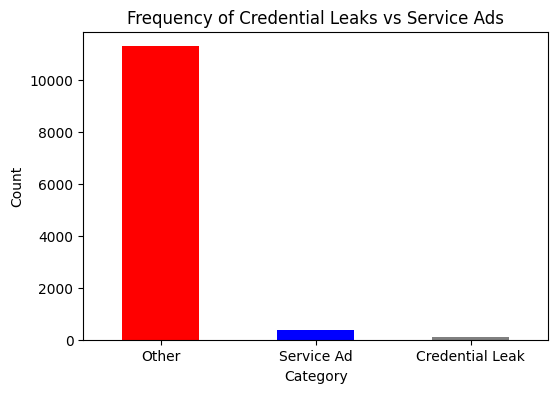

In [14]:
# --- Visualization ---
plt.figure(figsize=(6,4))
freq.plot(kind="bar", color=["red","blue","gray"])
plt.title("Frequency of Credential Leaks vs Service Ads")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.show()

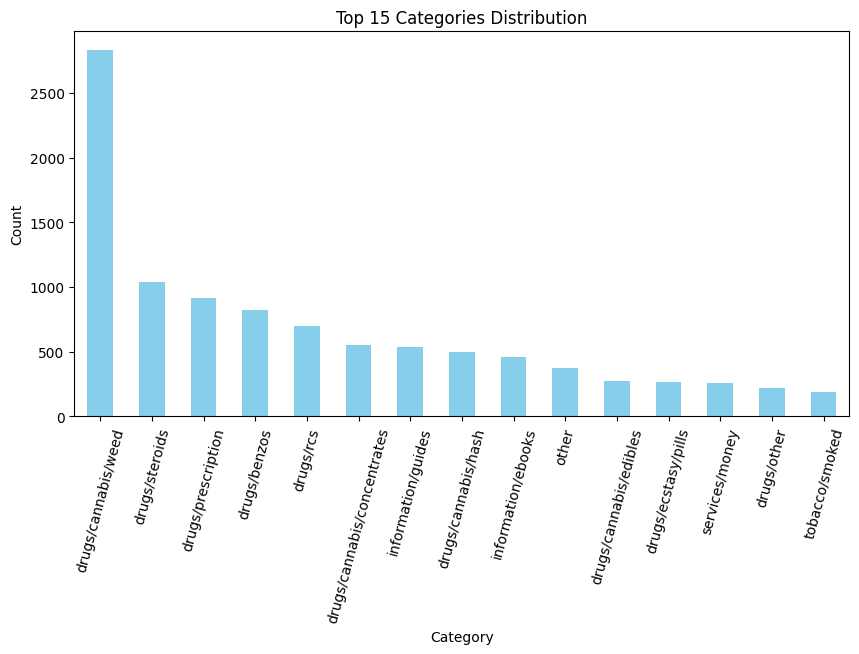

In [15]:
# ---------- Distribution of Categories ----------
plt.figure(figsize=(10,5))
df['category'].value_counts().head(15).plot(kind='bar', color="skyblue")
plt.title("Top 15 Categories Distribution")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=75)
plt.show()

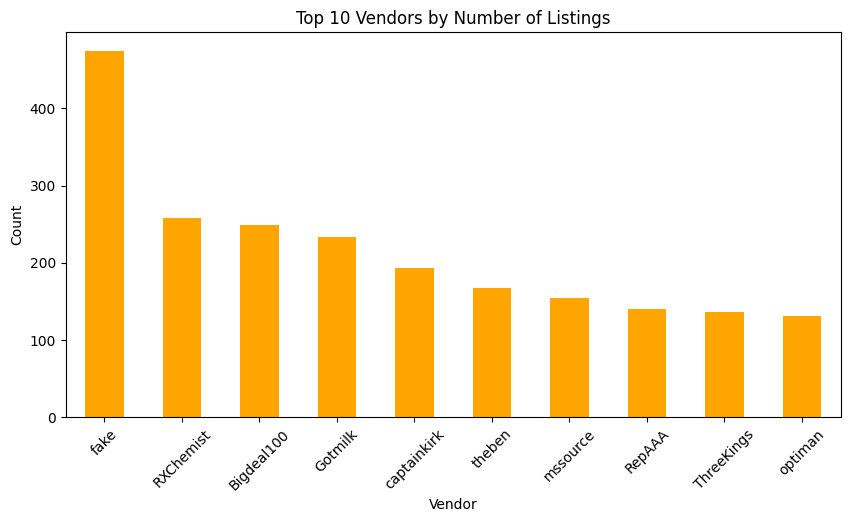

In [16]:
# ---------- Top Vendors by Listings ----------
plt.figure(figsize=(10,5))
df['vendor'].value_counts().head(10).plot(kind='bar', color="orange")
plt.title("Top 10 Vendors by Number of Listings")
plt.ylabel("Count")
plt.xlabel("Vendor")
plt.xticks(rotation=45)
plt.show()

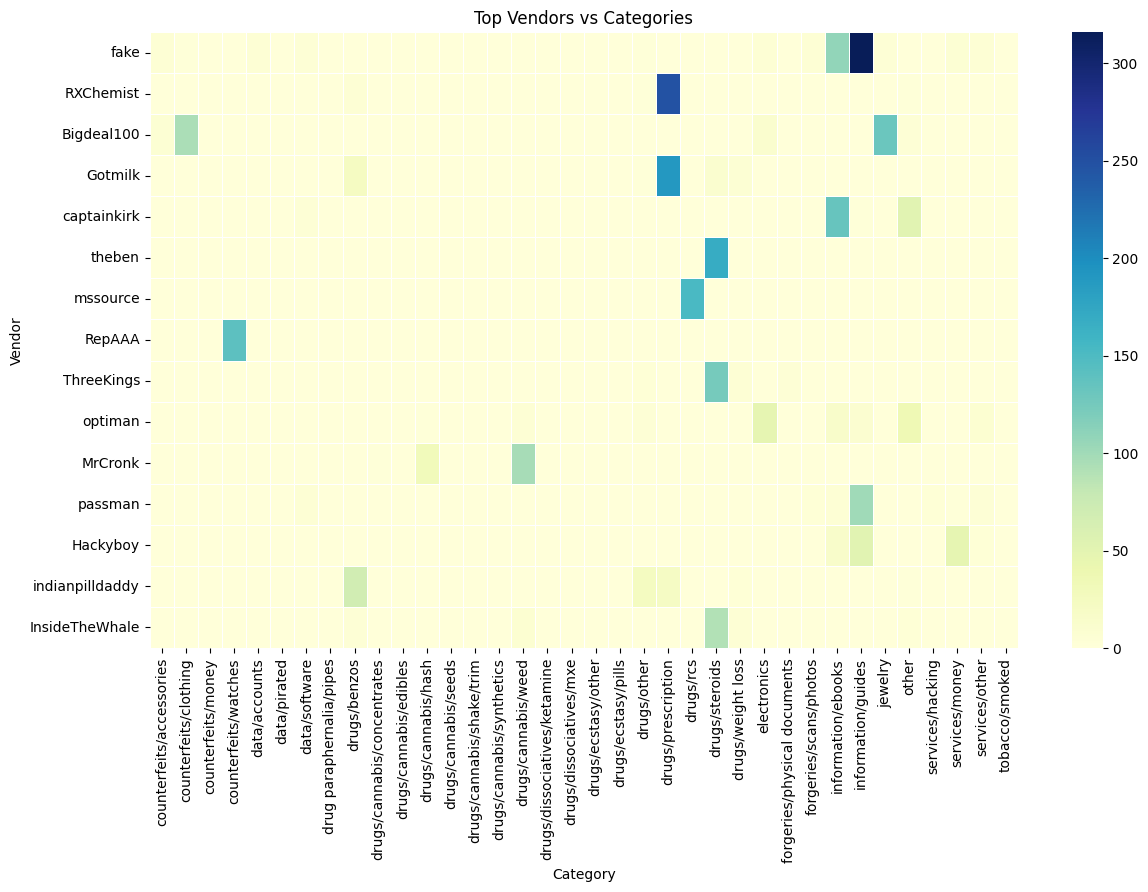

In [17]:
# ----------  Category vs Vendor Heatmap ----------
vendor_cat = pd.crosstab(df['vendor'], df['category'])

# Calculate the total number of listings for each vendor
vendor_totals = vendor_cat.sum(axis=1)

# Select the top 15 vendors based on their total listings
top_vendors_index = vendor_totals.nlargest(15).index
top_vendor_cat = vendor_cat.loc[top_vendors_index]


plt.figure(figsize=(14,8))
sns.heatmap(top_vendor_cat, cmap="YlGnBu", linewidths=.5)
plt.title("Top Vendors vs Categories")
plt.xlabel("Category")
plt.ylabel("Vendor")
plt.show()